In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('nba.csv')

In [3]:
df


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [4]:
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [5]:
df.shape

(458, 9)

In [6]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.drop(index=457, inplace=True,axis=0)

In [8]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [9]:
df.isna().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [10]:
df.dropna(subset=['College'],inplace=True)

In [11]:
df['Salary'].fillna(df['Salary'].mean(),inplace=True)

In [12]:
df['Age']

0      25.0
1      25.0
2      27.0
3      22.0
6      21.0
       ... 
449    23.0
451    26.0
452    20.0
453    26.0
456    26.0
Name: Age, Length: 373, dtype: float64

In [13]:
df['Age'].value_counts().sort_index()

19.0     2
20.0    15
21.0    14
22.0    23
23.0    34
24.0    43
25.0    42
26.0    32
27.0    36
28.0    28
29.0    18
30.0    20
31.0    17
32.0     9
33.0     8
34.0     7
35.0     8
36.0     9
37.0     2
38.0     3
39.0     1
40.0     2
Name: Age, dtype: int64

In [14]:
df['Age']=pd.cut(df['Age'],bins=range(15,45,5))

In [15]:
df.groupby('Age')['Salary'].min()

Age
(15, 20]    525093.0
(20, 25]     55722.0
(25, 30]     55722.0
(30, 35]    200600.0
(35, 40]    222888.0
Name: Salary, dtype: float64

In [16]:
df.groupby('Age')['Salary'].mean()

Age
(15, 20]    2.536190e+06
(20, 25]    3.140665e+06
(25, 30]    6.346138e+06
(30, 35]    6.055065e+06
(35, 40]    2.543320e+06
Name: Salary, dtype: float64

In [17]:
df.groupby('Age')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
"(15, 20]",17.0,2.536190e+06,1.523857e+06,525093.0,1733040.0,2.239800e+06,2841960.00,5703600.0
"(20, 25]",156.0,3.140665e+06,3.827577e+06,55722.0,947276.0,1.481520e+06,3476683.25,16407501.0
"(25, 30]",134.0,6.346138e+06,5.761633e+06,55722.0,1270964.0,4.560156e+06,9912500.00,20158622.0
"(30, 35]",49.0,6.055065e+06,6.032237e+06,200600.0,2100000.0,4.290000e+06,6500000.00,22875000.0
"(35, 40]",17.0,2.543320e+06,1.877013e+06,222888.0,947276.0,2.170465e+06,4088019.00,5675000.0


In [18]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,"(20, 25]",6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.0,SF,"(20, 25]",6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.0,SG,"(25, 30]",6-5,205.0,Boston University,4.620311e+06
3,R.J. Hunter,Boston Celtics,28.0,SG,"(20, 25]",6-5,185.0,Georgia State,1.148640e+06
6,Jordan Mickey,Boston Celtics,55.0,PF,"(20, 25]",6-8,235.0,LSU,1.170960e+06


In [19]:
df['Age'].value_counts()

(20, 25]    156
(25, 30]    134
(30, 35]     49
(15, 20]     17
(35, 40]     17
Name: Age, dtype: int64

<Axes: >

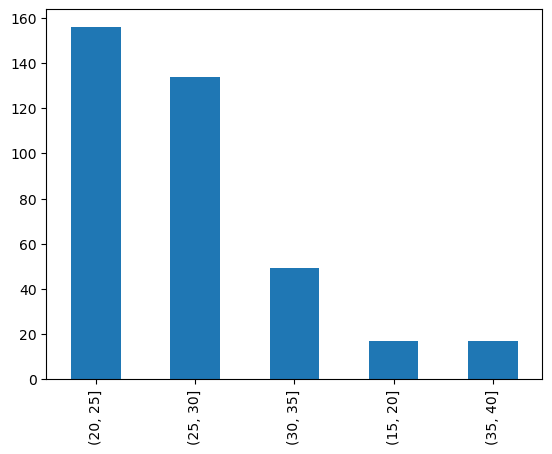

In [22]:
df['Age'].value_counts().plot(kind="bar")